<a href="https://colab.research.google.com/github/tesa0/ML_python/blob/main/YaMetrics_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libs and files

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sb     
import matplotlib.pyplot as plt     
import datetime
import sklearn.model_selection
import sklearn.metrics
import re 

from datetime import datetime

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score,precision_recall_curve # plot_confusion_matrix

from tensorflow.keras.callbacks import ModelCheckpoint,Callback,BackupAndRestore
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization 
from tensorflow.keras import utils   
from tensorflow.keras.optimizers import Adam, Adadelta 

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

# import warnings
# from pandas.core.common import SettingWithCopyWarning
# warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

Mounted at /content/drive


In [ ]:
file_path1 = '/content/drive/MyDrive/MA/t1_20220101_20220726_rg_201589066.csv'            # счетчик 1.1, цель 201589066, 22-01-01 - 22-07-26 visits
df_11_201589066 = pd.read_csv(file_path1, header=0)
file_path12 = '/content/drive/MyDrive/MA/t1_20220601_20220621_rg_201589066.csv'            # счетчик 1.2, цель 201589066, 22-06-01 - 22-06-21 visits
df_12_201589066 = pd.read_csv(file_path12, header=0)
file_path2 = '/content/drive/MyDrive/MA/t2_20190101_20191231_rg_201711160.csv'            # счетчик 2, цель 201711160, 2019 visits
df_2_201711160 = pd.read_csv(file_path2, header=0)
file_path3 = '/content/drive/MyDrive/MA/t3_20220101_20230106 rg_184390113,199898941.csv'  # счетчик 3, цели 184390113/199898941, 22-01-01 - 23-01-06 visits
df_3_184390113_199898941 = pd.read_csv(file_path3, header=0)
file_path4 = '/content/drive/MyDrive/MA/t4_20220601_20220621_rg_106176610.csv'            # счетчик 4, цель 106176610, 22-06-01 - 22-06-21 visits
df_4_106176610 = pd.read_csv(file_path4, header=0)

<ipython-input-2-9fa1046977c7>:2: DtypeWarning: Columns (12,39,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_11_201589066 = pd.read_csv(file_path1, header=0)
<ipython-input-2-9fa1046977c7>:4: DtypeWarning: Columns (12,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_12_201589066 = pd.read_csv(file_path12, header=0)
<ipython-input-2-9fa1046977c7>:6: DtypeWarning: Columns (12,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2_201711160 = pd.read_csv(file_path2, header=0)
<ipython-input-2-9fa1046977c7>:8: DtypeWarning: Columns (12,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_3_184390113_199898941 = pd.read_csv(file_path3, header=0)
<ipython-input-2-9fa1046977c7>:10: DtypeWarning: Columns (12,33,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_4_106176610 = pd.read_csv(file_path4, header=0)


## Prepare data for train - Assign 1 if goal reached and 0 if not

In [ ]:
df11 = df_11_201589066.copy()
df12 = df_12_201589066.copy()
df2 = df_2_201711160.copy()
df3 = df_3_184390113_199898941.copy()
df4 = df_4_106176610.copy()

In [ ]:
# для df11 и df12
goal1 = ['36276007', '201589063', '201589066', '204564793', '36276010', '36276013', '116942056', '152446045' , '66245989']
# 36276007 - Заявка // Все
# 201589063 - Уникально-целевой звонок
# 201589066 - Целевой звонок
# 204564793 - Первичный целевой звонок
# 36276010 - Заявка // Целевая
# 36276013 - Заявка // Mobile Direct
# 116942056 - Забронировать
# 152446045 - Event - Более 60 секунд + просмотр страницы контакты
# 66245989 - Просмотр планировки
goal2 = ['49774219', '201711154', '201711157', '201711160', '57622798', '57622819', '57622921', '98810011' , '97167589', '179026429', '179026432', '179026438', '179026444', '195793024', '229599944']
# 49774219 - Клик по номеру телефона
# 201711154 - Уникальный звонок
# 201711157 - Уникально-целевой звонок
# 201711160 - Целевой звонок
# 57622798 - Посетил страницу "Контакты"
# 57622819 - Посетил страницу "Подбор квартир"
# 57622921 - Посетил страницу "Ипотека"
# 98810011 - CoMagic // отправка формы
# 97167589 - Чаты CoMagic
# 179026429 - Автоцель: отправка формы
# 179026432 - Автоцель: переход в мессенджер
# 179026438 - Автоцель: клик по номеру телефона
# 179026444 - Автоцель: клик по email
# 195793024 - Автоцель: переход в соц.сеть
# 229599944 - Заявки CoMagic

# goal3 = ['184390113','199898941']
goal3 = ['184390113', '202383175','202383178','202383181','184471539','185475457','186321742','199898941','199915663','202406278',
         '202487923','202530652','202530664','213581695','214622869','214623034','222483171','222483175','222515063',
         '226403682','226405439','226407340','231558847','236265808','249237695','252634848','252652143']
# 184390113 - Звонок Calltouch
# 202383175 - Уникальный звонок
# 202383178 - Уникально-целевой звонок
# 202383181 - Целевой звонок
# 184471539 - Автоцель: отправка формы
# 185475457 - Скролл страницы до конца
# 186321742 - Автоцель: поиск по сайту
# 199898941 - Обратный звонок - отправка формы
# 199915663 - Автоцель: клик по номеру телефона
# 202406278 - Автоцель: скачивание файла
# 202487923 - Автоцель: переход в соц.сеть
# 202530652 - Переход в контакты
# 202530664 - Переход в выбор квартиры
# 213581695 - Открыл презентацию
# 214622869 - Посетил \"О проекте\"
# 214623034 - Посетил \"Галерея\"
# 222483171 - Дошел до формы контактов
# 222483175 - Оставил заявку
# 222515063 - Клик по номеру
# 226403682 - Клик по номеру
# 226405439 - Скачать презентацию
# 226407340 - Отправка формы
# 231558847 - Автоцель: переход в мессенджер
# 236265808 - целевой
# 249237695 - Автоцель: заполнил контактные данные
# 252634848 - Нажатие на кнопку обратного звонка
# 252652143 - контакты

# goal4 = ['106176610']
goal4 = ['106176610','201996193','201996196','201996199','124459876','124459882','253445957',
         '133210102','133209865','274438707','274426087','133210801','130551832','130551901',
         '133209838','274429386','133210525','133210177','133210540','195687070']
# 106176610 - Звонок
# 201996193 - Уникальный звонок
# 201996196 - Уникально-целевой звонок
# 201996199 - Целевой звонок
# 124459876 - Клик на номер
# 124459882 - Клик Забронировать
# 253445957 - Форма // Успешное бронирование
# 133210102 - Клик // Забронировать квартиру
# 133209865 - Клик // Показать квартиры
# 274438707 - Переход // Список лотов
# 274426087 - Клик // Добавить в избранное
# 133210801 - Просмотр планировки
# 130551832 - Клик по номеру телефона
# 130551901 - Клик по e-mail
# 133209838 - Клик // Переход в планировку
# 274429386 - Авторизация
# 133210525 - Клик // Скачивание брошюр
# 133210177 - Клик // Блок Генплан
# 133210540 - Клик // Ипотека
# 195687070 - Заявка // Целевая

In [ ]:
# # Проверка, сколько записей по каждой цели мы имеем в первом датасете

# goal1 = ['36276007', '201589063', '201589066', '204564793', '36276010', '36276013', '116942056', '152446045' , '66245989']
# for goal in goal1:
#   df11 = df_11_201589066.copy()
#   success = df11['ym:s:goalsID'].str.contains(goal)
#   # Assign 1 if goal reached and 0 if not
#   df11['ym:s:goalsID'].loc[success] = 1
#   print(f'Goal {goal} reached in ', success.sum(), 'of', df11.shape[0],'visits')
# df11['ym:s:goalsID'].loc[~1] = 0

In [ ]:
# Assign 1 if goal reached and 0 if not
goals = [goal1,goal1,goal2,goal3,goal4]
dfs = [df11,df12,df2,df3,df4]
ids = [11,12,2,3,4]

for goals, df, id in zip(goals, dfs, ids): 
  df['Y'] = 0

  # Каждая строка целевой колонки является списком
  for index, row in df.iterrows():

    # print(id, goals,                          index, row['ym:s:goalsID'])
    #       11  ['201589063', '201589066', ...] 6      []
    #       11  ['201589063', '201589066', ...] 7      [45605569,152446093,45085622]

    if any(goal in row['ym:s:goalsID'] for goal in goals):
      df.loc[index,'Y'] = 1
def check_goals():
  dfs = [df11,df12,df2,df3,df4]
  ids = [11,12,2,3,4]
  for df, id in zip(dfs, ids): 
    print(f'Goal reached in df{id}', df['Y'].sum(), 'times in', df.shape[0],'visits')
check_goals()

Goal reached in df11 13211 times in 361919 visits
Goal reached in df12 803 times in 33960 visits
Goal reached in df2 98532 times in 831061 visits
Goal reached in df3 182478 times in 734358 visits
Goal reached in df4 30620 times in 306922 visits


## Clean data from nan

In [ ]:
def cols_to_drop(df):
  cols_to_drop = ['Unnamed: 0.1','Unnamed: 0','ym:s:from','ym:s:lastSocialNetworkProfile',
                'ym:s:lastSocialNetwork','ym:s:openstatAd','ym:s:openstatCampaign','ym:s:openstatService',
                'ym:s:openstatSource','ym:s:browserCountry','ym:s:firstGCLID','ym:s:lastDirectClickOrder',
                'ym:s:lastDirectPlatform','ym:s:lastGCLID','ym:s:lastReferalSource',
                'ym:s:lastSignificantGCLID','ym:s:networkType', 'ym:s:referer','ym:s:regionCity',
                'ym:s:UTMCampaign','ym:s:UTMContent','ym:s:UTMSource','ym:s:UTMTerm','ym:s:browserLanguage',
                'ym:s:cookieEnabled','ym:s:goalsPrice','ym:s:goalsSerialNumber',
                'ym:s:ipAddress','ym:s:impressionsProductCoupon','ym:s:offlineCallHoldDuration',
                'ym:s:offlineCallMissed','ym:s:offlineCallURL','ym:s:watchIDs', 'ym:s:javascriptEnabled', 'ym:s:lastDirectPhraseOrCond']
  df.drop(cols_to_drop, axis=1,inplace=True)
  return df

In [ ]:
df11 = cols_to_drop(df11)

In [ ]:
df12 = cols_to_drop(df12)

In [ ]:
df2 = cols_to_drop(df2)

In [ ]:
df3 = cols_to_drop(df3)

In [ ]:
df4 = cols_to_drop(df4)

In [ ]:
check_goals()

Goal reached in df11 13211 times in 361919 visits
Goal reached in df12 803 times in 33960 visits
Goal reached in df2 98532 times in 831061 visits
Goal reached in df3 182478 times in 734358 visits
Goal reached in df4 30620 times in 306922 visits


In [ ]:
def clean_df(df1):

  df1['ym:s:date'] = [pd.to_datetime(x) for x in df1['ym:s:date']]
  df1['ym:s:lastDirectBannerGroup'] = [0 if el==0 else 1 for el in df1['ym:s:lastDirectBannerGroup']]

  df1['ym:s:offlineCallTag'] = [el.lower() for el in df1['ym:s:offlineCallTag']]
  df[~df["ym:s:offlineCallTag"].str.contains("[a-zA-Z]")]["ym:s:offlineCallTag"] = 'пусто'
  df1['ym:s:offlineCallTag'] = ['вторичный' if 'вторичный' in el else el for el in df1['ym:s:offlineCallTag']]
  df1['ym:s:offlineCallTag'] = ['целевой' if 'целевой' in el else el for el in df1['ym:s:offlineCallTag']]
  df1['ym:s:offlineCallTag'] = ['спорный' if 'спорный' in el else el for el in df1['ym:s:offlineCallTag']]
  df1['ym:s:offlineCallTag'] = ['пусто' if 'ошибка' in el else el for el in df1['ym:s:offlineCallTag']]
  df1['ym:s:offlineCallTag'] = ['нецелевой' if 'нецелевой' in el else el for el in df1['ym:s:offlineCallTag']]
  df1['ym:s:offlineCallTag'] = ['пусто' if 'спам' in el else el for el in df1['ym:s:offlineCallTag']]

  df1['ym:s:endURL'] = [x[7:] for x in df1['ym:s:endURL']]
  df1['ym:s:startURL'] = [x[9:] for x in df1['ym:s:startURL']]

  df1['ym:s:offlineCallTalkDuration'] = [x[1:-1] for x in df1['ym:s:offlineCallTalkDuration']]
  df1['ym:s:offlineCallTalkDuration'] = [x.replace("''","") for x in df1['ym:s:offlineCallTalkDuration']]
  df1['ym:s:offlineCallTalkDuration'] = ['0' if x == '' else max(x.split(',')) for x in df1['ym:s:offlineCallTalkDuration']]
  df1['ym:s:offlineCallTalkDuration'] = [int(x) for x in df1['ym:s:offlineCallTalkDuration']]
  df1['ym:s:offlineCallTalkDuration'] = df1['ym:s:offlineCallTalkDuration']/max(df1['ym:s:offlineCallTalkDuration'])

  df1['ym:s:diagonal'] = ((df1['ym:s:screenHeight']**2+df1['ym:s:screenWidth']**2)**0.5)
  df1['ym:s:diagonal'] = round(df1['ym:s:diagonal'] / max(df1['ym:s:diagonal']),2)

  df1 = df1.drop(['ym:s:screenHeight', 'ym:s:screenWidth'], axis=1)

  df1['ym:s:lastDirectClickBanner'] = [0 if el==0 else 1 for el in df1['ym:s:lastDirectClickBanner']]

  df1['ym:s:lastDirectClickBannerName'] = [re.sub(r'[^0-9]', '', x) for x in df1['ym:s:lastDirectClickBannerName'].astype(str)]
  df1['ym:s:lastDirectClickBannerName'] = [int(x) for x in df1['ym:s:lastDirectClickBannerName']]
  df1['ym:s:lastDirectClickBannerName'] = round((df1['ym:s:lastDirectClickBannerName'])/max(df1['ym:s:lastDirectClickBannerName']),2)

  df1['ym:s:visitDuration'] = round((df1['ym:s:visitDuration'])/max(df1['ym:s:visitDuration']),2)

  # df1['ym:s:lastDirectPhraseOrCond'] = [x[23:] for x in df1['ym:s:lastDirectPhraseOrCond']]

  df1['ym:s:goalsDateTime'] = [x.replace("[","") for x in df1['ym:s:goalsDateTime']]
  df1['ym:s:goalsDateTime'] = [x.replace("]","") for x in df1['ym:s:goalsDateTime']]
  df1['ym:s:goalsDateTime'] = [x[2:12] for x in df1['ym:s:goalsDateTime']]
  # df1 = df1.drop(df1[df1['ym:s:goalsDateTime']==''].index) # ---------------------------------------------
  # df1['ym:s:goalsDateTime'] = ['0' if x == '' else datetime.strptime(x, '%Y-%m-%d') for x in df1['ym:s:goalsDateTime']]

  # df1['ym:s:deltaTime'] = df1['ym:s:goalsDateTime'] - df1['ym:s:date']
  # df1['ym:s:deltaTime'] = [x.components.days for x in df1['ym:s:deltaTime']]
  # df1['ym:s:deltaTime'] = df1['ym:s:deltaTime']/max(df1['ym:s:deltaTime'] )

  df1.drop(['ym:s:date', 'ym:s:goalsDateTime'], axis=1, inplace=True)
  
  return df1

In [ ]:
df11 = clean_df(df11)

<ipython-input-14-412e397b3308>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[~df["ym:s:offlineCallTag"].str.contains("[a-zA-Z]")]["ym:s:offlineCallTag"] = 'пусто'


In [ ]:
df12 = clean_df(df12)

<ipython-input-14-412e397b3308>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[~df["ym:s:offlineCallTag"].str.contains("[a-zA-Z]")]["ym:s:offlineCallTag"] = 'пусто'


In [ ]:
df2 = clean_df(df2)

<ipython-input-14-412e397b3308>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[~df["ym:s:offlineCallTag"].str.contains("[a-zA-Z]")]["ym:s:offlineCallTag"] = 'пусто'


In [ ]:
df3 = clean_df(df3)

<ipython-input-14-412e397b3308>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[~df["ym:s:offlineCallTag"].str.contains("[a-zA-Z]")]["ym:s:offlineCallTag"] = 'пусто'


In [ ]:
df4 = clean_df(df4)

<ipython-input-14-412e397b3308>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[~df["ym:s:offlineCallTag"].str.contains("[a-zA-Z]")]["ym:s:offlineCallTag"] = 'пусто'


In [ ]:
check_goals()

Goal reached in df11 13211 times in 361919 visits
Goal reached in df12 803 times in 33960 visits
Goal reached in df2 98532 times in 831061 visits
Goal reached in df3 182478 times in 734358 visits
Goal reached in df4 30620 times in 306922 visits


In [ ]:
df11['ym:s:lastClickBannerGroupName'] = [el.lower() for el in df11['ym:s:lastClickBannerGroupName']]
df11['ym:s:lastClickBannerGroupName'] = ['2022' if '2022' in el else el for el in df11['ym:s:lastClickBannerGroupName']]
df11['ym:s:lastClickBannerGroupName'] = ['фили' if 'фили' in el else el for el in df11['ym:s:lastClickBannerGroupName']]
df11['ym:s:lastClickBannerGroupName'] = ['Headliner' if 'headliner' in el else el for el in df11['ym:s:lastClickBannerGroupName']]
df11['ym:s:lastClickBannerGroupName'] = ['застройщик' if 'застройщик' in el else el for el in df11['ym:s:lastClickBannerGroupName']]
df11['ym:s:lastClickBannerGroupName'] = ['Не отказ' if 'не отказ' in el else el for el in df11['ym:s:lastClickBannerGroupName']]
df11['ym:s:lastClickBannerGroupName'] = ['конкурент' if 'конкурент' in el else el for el in df11['ym:s:lastClickBannerGroupName']]
df11['ym:s:lastClickBannerGroupName'] = ['запрос' if 'запрос' in el else el for el in df11['ym:s:lastClickBannerGroupName']]
df11['ym:s:lastClickBannerGroupName'] = ['2021' if '2021' in el else el for el in df11['ym:s:lastClickBannerGroupName']]
df11['ym:s:lastClickBannerGroupName'] = ['жк' if 'жк' in el else el for el in df11['ym:s:lastClickBannerGroupName']]
df11['ym:s:lastClickBannerGroupName'] = ['центр сити' if 'центр сити' in el else el for el in df11['ym:s:lastClickBannerGroupName']]
df11['ym:s:lastClickBannerGroupName'] = ['москва' if 'москв' in el else el for el in df11['ym:s:lastClickBannerGroupName']]

In [ ]:
df12['ym:s:lastClickBannerGroupName'] = [el.lower() for el in df12['ym:s:lastClickBannerGroupName'].astype(str)]
df12['ym:s:lastClickBannerGroupName'] = ['2022' if '2022' in el else el for el in df12['ym:s:lastClickBannerGroupName']]
df12['ym:s:lastClickBannerGroupName'] = ['айти' if 'it' in el else el for el in df12['ym:s:lastClickBannerGroupName']]
df12['ym:s:lastClickBannerGroupName'] = ['бизнес' if 'бизнес' in el else el for el in df12['ym:s:lastClickBannerGroupName']]
df12['ym:s:lastClickBannerGroupName'] = ['неотказ' if 'не отказ' in el else el for el in df12['ym:s:lastClickBannerGroupName']]
df12['ym:s:lastClickBannerGroupName'] = ['хэд' if 'headliner' in el else el for el in df12['ym:s:lastClickBannerGroupName']]
df12['ym:s:lastClickBannerGroupName'] = ['запад' if 'запад' in el else el for el in df12['ym:s:lastClickBannerGroupName']]
df12['ym:s:lastClickBannerGroupName'] = ['москва' if 'москв' in el else el for el in df12['ym:s:lastClickBannerGroupName']]
df12['ym:s:lastClickBannerGroupName'] = ['москва' if 'city' in el else el for el in df12['ym:s:lastClickBannerGroupName']]
df12['ym:s:lastClickBannerGroupName'] = ['москва' if 'сити' in el else el for el in df12['ym:s:lastClickBannerGroupName']]
df12['ym:s:lastClickBannerGroupName'] = ['москва' if 'столиц' in el else el for el in df12['ym:s:lastClickBannerGroupName']]
df12['ym:s:lastClickBannerGroupName'] = ['информационные' if 'цена' in el else el for el in df12['ym:s:lastClickBannerGroupName']]
df12['ym:s:lastClickBannerGroupName'] = ['информационные' if 'информационные' in el else el for el in df12['ym:s:lastClickBannerGroupName']]
df12['ym:s:lastClickBannerGroupName'] = ['информационные' if 'общие' in el else el for el in df12['ym:s:lastClickBannerGroupName']]
df12['ym:s:lastClickBannerGroupName'] = ['шелепиха' if 'шелепих' in el else el for el in df12['ym:s:lastClickBannerGroupName']]
df12['ym:s:lastClickBannerGroupName'] = ['зорге' if 'зорге' in el else el for el in df12['ym:s:lastClickBannerGroupName']]
df12['ym:s:lastClickBannerGroupName'] = ['пресна' if 'пресн' in el else el for el in df12['ym:s:lastClickBannerGroupName']]
df12['ym:s:lastClickBannerGroupName'] = ['фили' if 'фили' in el else el for el in df12['ym:s:lastClickBannerGroupName']]
df12['ym:s:lastClickBannerGroupName'] = ['озон' if 'озон' in el else el for el in df12['ym:s:lastClickBannerGroupName']]
df12['ym:s:lastClickBannerGroupName'] = ['ипотека' if 'ипотека' in el else el for el in df12['ym:s:lastClickBannerGroupName']]
# df12['ym:s:lastClickBannerGroupName'].fillna('noinfo', inplace = True)
df12['ym:s:lastClickBannerGroupName'] = ['noinfo' if 'nan' in el else el for el in df12['ym:s:lastClickBannerGroupName']]

In [ ]:
df2['ym:s:lastClickBannerGroupName'] = [el.lower() for el in df2['ym:s:lastClickBannerGroupName'].astype(str)]
df2['ym:s:lastClickBannerGroupName'] = ['бренд' if 'бренд' in el else el for el in df2['ym:s:lastClickBannerGroupName']]
df2['ym:s:lastClickBannerGroupName'] = ['баннер' if 'баннер' in el else el for el in df2['ym:s:lastClickBannerGroupName']]
df2['ym:s:lastClickBannerGroupName'] = ['аренда' if '_аренда' in el else el for el in df2['ym:s:lastClickBannerGroupName']]
df2['ym:s:lastClickBannerGroupName'] = ['тгб' if 'тгб' in el else el for el in df2['ym:s:lastClickBannerGroupName']]
df2['ym:s:lastClickBannerGroupName'] = ['клен' if 'клен' in el else el for el in df2['ym:s:lastClickBannerGroupName']]
df2['ym:s:lastClickBannerGroupName'] = ['keuco' if 'keuco' in el else el for el in df2['ym:s:lastClickBannerGroupName']]
df2['ym:s:lastClickBannerGroupName'] = ['новаямосква' if 'новая москв' in el else el for el in df2['ym:s:lastClickBannerGroupName']]
df2['ym:s:lastClickBannerGroupName'] = ['комнат' if 'комнат' in el else el for el in df2['ym:s:lastClickBannerGroupName']]
df2['ym:s:lastClickBannerGroupName'] = [re.sub(r'[0-9]', 'n', x) for x in df2['ym:s:lastClickBannerGroupName']]
df2['ym:s:lastClickBannerGroupName'] = [x.replace("помещение под","") for x in df2['ym:s:lastClickBannerGroupName']]
df2['ym:s:lastClickBannerGroupName'] = [x.replace(" (копия)","") for x in df2['ym:s:lastClickBannerGroupName']]
df2['ym:s:lastClickBannerGroupName'] = ['коммерч' if 'коммерч' in el else el for el in df2['ym:s:lastClickBannerGroupName']]
df2['ym:s:lastClickBannerGroupName'] = ['ретаргетинг' if 'ретаргетинг' in el else el for el in df2['ym:s:lastClickBannerGroupName']]
df2['ym:s:lastClickBannerGroupName'] = [x.replace(" ","") for x in df2['ym:s:lastClickBannerGroupName']]

In [ ]:
df3.drop('ym:s:lastClickBannerGroupName', axis=1, inplace=True) # слишком много категорий

In [ ]:
df4['ym:s:lastClickBannerGroupName'] = [el.lower() for el in df4['ym:s:lastClickBannerGroupName'].astype(str)]
df4['ym:s:lastClickBannerGroupName'] = [re.sub(r'[^0-9]', '', x) for x in df4['ym:s:lastClickBannerGroupName']]
df4['ym:s:lastClickBannerGroupName'] = round((df4['ym:s:lastClickBannerGroupName'].astype(float))/max(df4['ym:s:lastClickBannerGroupName'].astype(float)),2)

## Prepare categorical data 

In [ ]:
# will be categories :
# Названия колонок которые необходимо закодирвать

cols_encode = ['ym:s:lastAdvEngine', 'ym:s:deviceCategory', 'ym:s:browser','ym:s:hasGCLID', 'ym:s:isNewUser', 
               'ym:s:lastDirectBannerGroup', 'ym:s:lastDirectClickBanner',
               'ym:s:offlineCallTag','ym:s:pageViews','ym:s:screenOrientation','ym:s:startURL',
               'ym:s:endURL','ym:s:bounce','ym:s:lastClickBannerGroupName','ym:s:lastClickBannerGroupName',
               'ym:s:lastDirectClickOrderName', 'ym:s:lastTrafficSource','ym:s:offlineCallFirstTimeCaller',
               'ym:s:lastSearchEngine','ym:s:lastSearchEngineRoot','ym:s:lastDirectConditionType','ym:s:lastDirectPlatformType',
               'ym:s:mobilePhone'] 

df11[cols_encode].replace(pd.NA,'empty') 
ledf11 = preprocessing.LabelEncoder()
for col in cols_encode:
  df11[col]=ledf11.fit_transform(df11[col])

df12[cols_encode].replace(pd.NA,'empty') 
ledf12 = preprocessing.LabelEncoder()
for col in cols_encode:
  df12[col]=ledf12.fit_transform(df12[col])

df2[cols_encode].replace(pd.NA,'empty') 
ledf2 = preprocessing.LabelEncoder()
for col in cols_encode:
  df2[col]=ledf2.fit_transform(df2[col])

df4[cols_encode].replace(pd.NA,'empty') 
ledf4 = preprocessing.LabelEncoder()
for col in cols_encode:
  df4[col]=ledf4.fit_transform(df4[col])

In [ ]:
for_df3_cols = ['ym:s:browser', 'ym:s:lastClickBannerGroupName', 'ym:s:lastSearchEngine', 'ym:s:lastSearchEngineRoot', 'ym:s:lastDirectConditionType', 'ym:s:lastDirectPlatformType', 'ym:s:mobilePhone']
cols_encode_3 = list(set(cols_encode) - set(for_df3_cols))
df3[cols_encode_3].replace(pd.NA,'empty') 
ledf3 = preprocessing.LabelEncoder()
for col in cols_encode_3:
  df3[col]=ledf3.fit_transform(df3[col])

## Prepare 1st column and check the distribution

In [ ]:
df11.drop(['ym:s:visitID','ym:s:clientID','ym:s:goalsID'], axis=1, inplace=True)
df11 = df11.dropna(axis=1)

df12.drop(['ym:s:visitID','ym:s:clientID','ym:s:goalsID'], axis=1, inplace=True)
df12 = df12.dropna(axis=1)

df2.drop(['ym:s:visitID','ym:s:clientID','ym:s:goalsID'], axis=1, inplace=True)
df2 = df2.dropna(axis=1)

df3.drop(['ym:s:visitID','ym:s:clientID','ym:s:goalsID'], axis=1, inplace=True)
df3 = df3.dropna(axis=1)

df4.drop(['ym:s:visitID','ym:s:clientID','ym:s:goalsID'], axis=1, inplace=True)
df4 = df4.dropna(axis=1)

In [ ]:
check_goals()

Goal reached in df11 13211 times in 361919 visits
Goal reached in df12 803 times in 33960 visits
Goal reached in df2 98532 times in 831061 visits
Goal reached in df3 182478 times in 734358 visits
Goal reached in df4 30620 times in 306922 visits


## Scaler

In [ ]:
def scale(df):
  # Переносим целевой столбец на первый столбец
  df['Y'] = df['Y'].astype(int)
  y = df['Y'].copy()
  df.drop('Y',  axis=1, inplace=True)
  df.insert(0,'Y', y)

  # Назначаем X и y
  X = df.iloc[:,1:]
  y = df.iloc[:,0]
  print(X.shape,y.shape)

  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  # Применим SelectKBest для извлечения лучших признаков
  from sklearn.feature_selection import SelectKBest
  model = SelectKBest(score_func=f_regression, k=19)
  fit = model.fit(X_scaled,y)

  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X.columns)
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  featureScores.columns = ['Specs','Score']  # названия столбцов нового датафрейма
  print(featureScores.nlargest(19,'Score'))  # печатаем лучшие признаки
  print()
  print()
   
  # Таблица корреляции признаков
  mask_1 = np.tril(df.corr())
  plt.figure(figsize=(15,15))
  sb.heatmap(df.corr(), cmap='coolwarm', vmin=-0.14, vmax=0.14, center= 0, square=True, annot=True, fmt='.1g', linewidths =0.05, linecolor= 'gray', mask = mask_1)
  plt.title("Корреляционная матрица", fontsize=12)
  plt.show()

  return(list(featureScores.nlargest(19,'Score')[:19]['Specs'])) 

(361919, 26) (361919,)
                              Specs         Score
18  ym:s:offlineCallFirstTimeCaller  76399.245946
19              ym:s:offlineCallTag  49961.903309
21                   ym:s:pageViews  26695.053093
20     ym:s:offlineCallTalkDuration  18607.457330
24               ym:s:visitDuration  16080.185241
3                       ym:s:endURL  14718.050320
23                    ym:s:startURL   5880.352524
11    ym:s:lastDirectClickOrderName   4877.147335
8        ym:s:lastDirectBannerGroup   4754.945584
2               ym:s:deviceCategory   4590.295784
16           ym:s:lastTrafficSource   4415.690196
13      ym:s:lastDirectPlatformType   4316.799474
7     ym:s:lastClickBannerGroupName   3539.304296
5                    ym:s:isNewUser   3515.545739
9        ym:s:lastDirectClickBanner   3505.866764
22           ym:s:screenOrientation   3208.470709
0                       ym:s:bounce   2800.511432
12     ym:s:lastDirectConditionType   2793.018767
25                    ym:s:

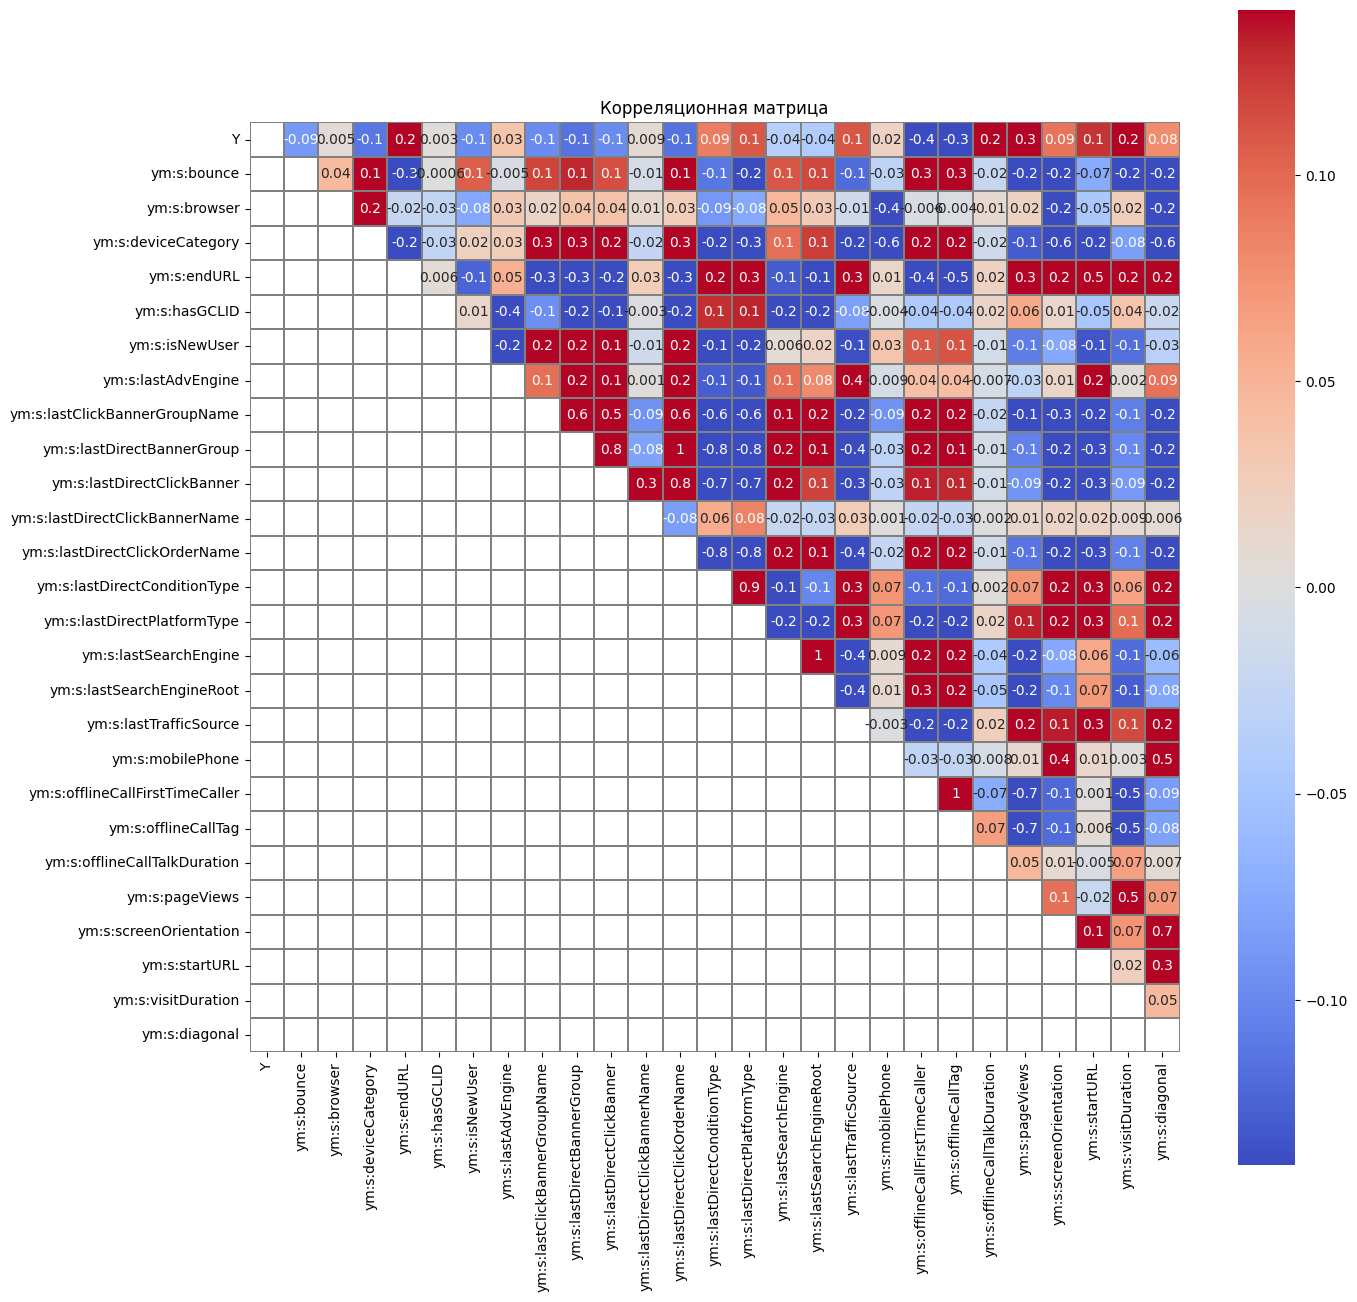

In [ ]:
list11best = scale(df11)

(33960, 26) (33960,)
                              Specs        Score
18  ym:s:offlineCallFirstTimeCaller  5744.991136
20     ym:s:offlineCallTalkDuration  2539.997663
19              ym:s:offlineCallTag  2475.691494
21                   ym:s:pageViews  1511.810276
3                       ym:s:endURL  1388.550030
23                    ym:s:startURL  1372.229090
24               ym:s:visitDuration   810.165877
16           ym:s:lastTrafficSource   552.342278
11    ym:s:lastDirectClickOrderName   497.083098
8        ym:s:lastDirectBannerGroup   471.045774
13      ym:s:lastDirectPlatformType   429.570395
5                    ym:s:isNewUser   310.169196
12     ym:s:lastDirectConditionType   291.643110
7     ym:s:lastClickBannerGroupName   284.262416
25                    ym:s:diagonal   272.378105
0                       ym:s:bounce   251.412799
9        ym:s:lastDirectClickBanner   237.136201
2               ym:s:deviceCategory   215.481125
6                ym:s:lastAdvEngine   207.540329

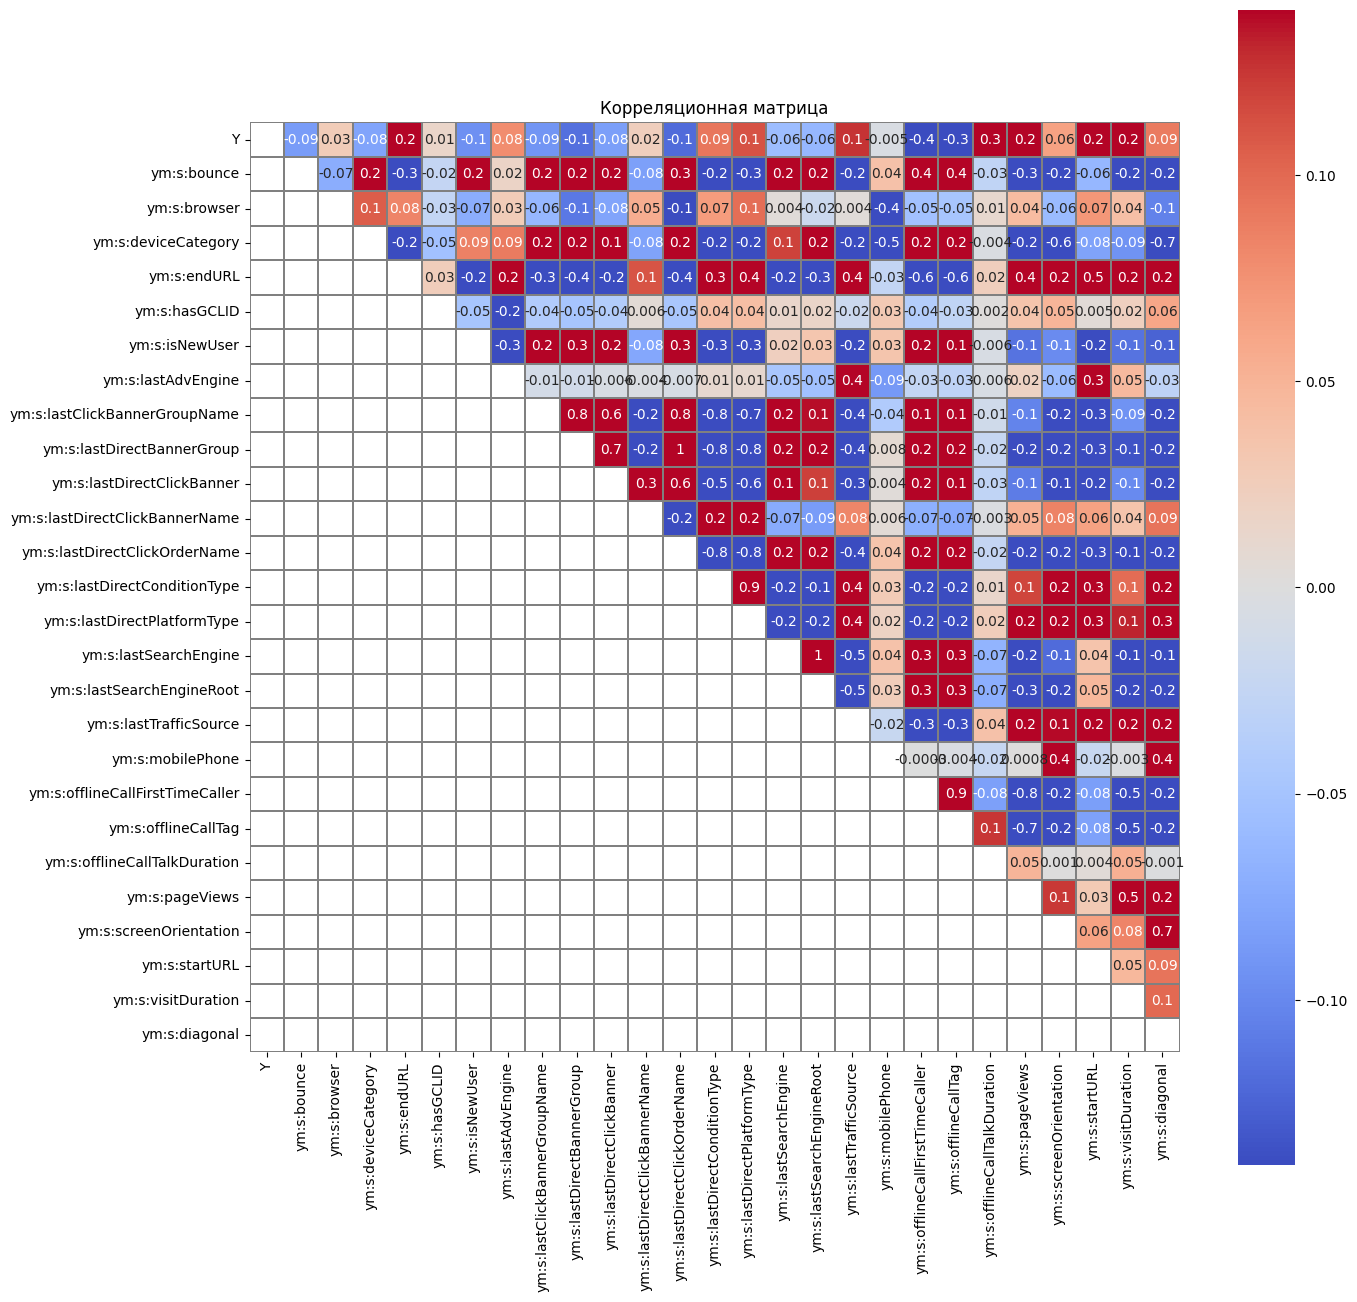

In [ ]:
list12best = scale(df12)

(831061, 26) (831061,)
                              Specs         Score
19              ym:s:offlineCallTag  1.665206e+06
18  ym:s:offlineCallFirstTimeCaller  1.637765e+06
0                       ym:s:bounce  8.455217e+03
24               ym:s:visitDuration  7.862230e+03
16           ym:s:lastTrafficSource  7.704942e+03
9        ym:s:lastDirectClickBanner  5.755104e+03
8        ym:s:lastDirectBannerGroup  4.905956e+03
11    ym:s:lastDirectClickOrderName  4.130188e+03
13      ym:s:lastDirectPlatformType  4.097658e+03
5                    ym:s:isNewUser  3.996385e+03
12     ym:s:lastDirectConditionType  3.484144e+03
21                   ym:s:pageViews  2.570523e+03
25                    ym:s:diagonal  2.429337e+03
14            ym:s:lastSearchEngine  2.305019e+03
15        ym:s:lastSearchEngineRoot  2.055252e+03
2               ym:s:deviceCategory  1.927076e+03
22           ym:s:screenOrientation  1.677341e+03
3                       ym:s:endURL  1.619556e+03
17                 ym:s:mob

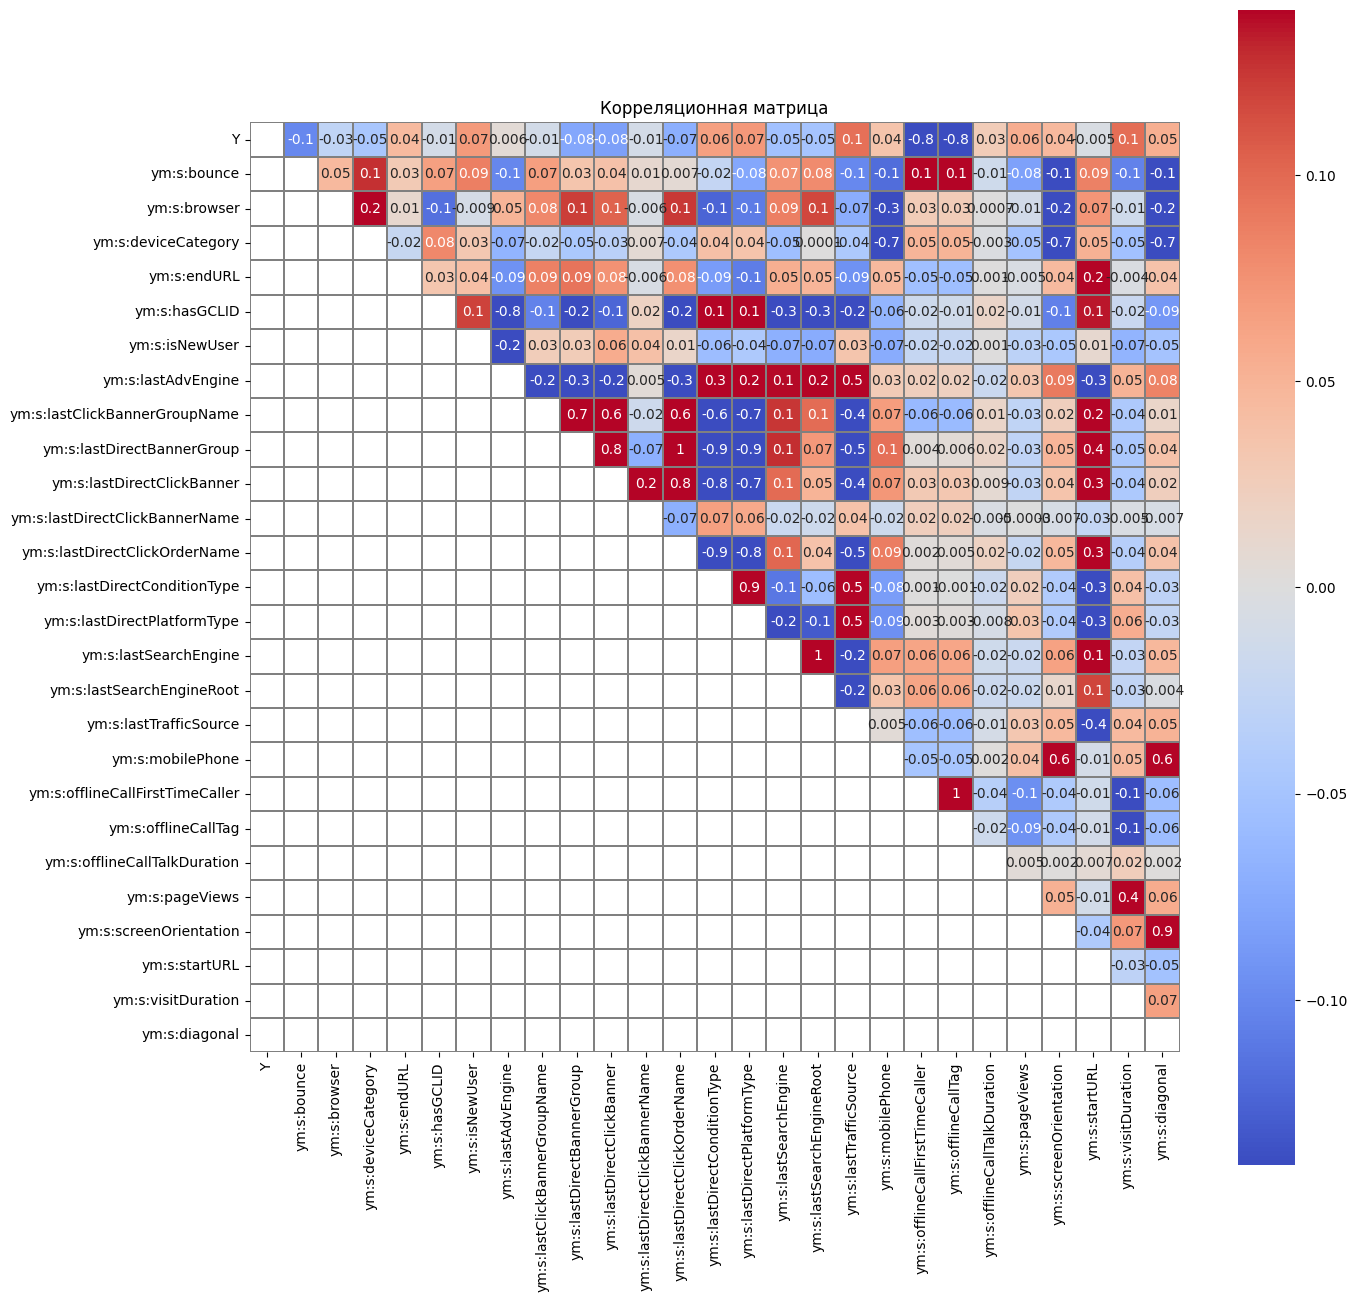

In [ ]:
list2best = scale(df2)

(734358, 19) (734358,)
                              Specs          Score
12              ym:s:offlineCallTag  640921.178022
11  ym:s:offlineCallFirstTimeCaller  559369.608771
14                   ym:s:pageViews  139858.145511
17               ym:s:visitDuration  115672.359235
18                    ym:s:diagonal  111093.319844
15           ym:s:screenOrientation  108536.850160
1               ym:s:deviceCategory  104142.866287
6        ym:s:lastDirectBannerGroup   70378.251807
7        ym:s:lastDirectClickBanner   57358.663457
0                       ym:s:bounce   27678.376912
9     ym:s:lastDirectClickOrderName   27131.870667
2                       ym:s:endURL   24084.703537
10           ym:s:lastTrafficSource   23794.736366
4                    ym:s:isNewUser   18037.217292
16                    ym:s:startURL   16906.638588
8    ym:s:lastDirectClickBannerName    5371.787083
13     ym:s:offlineCallTalkDuration     929.298716
5                ym:s:lastAdvEngine     218.570944
3       

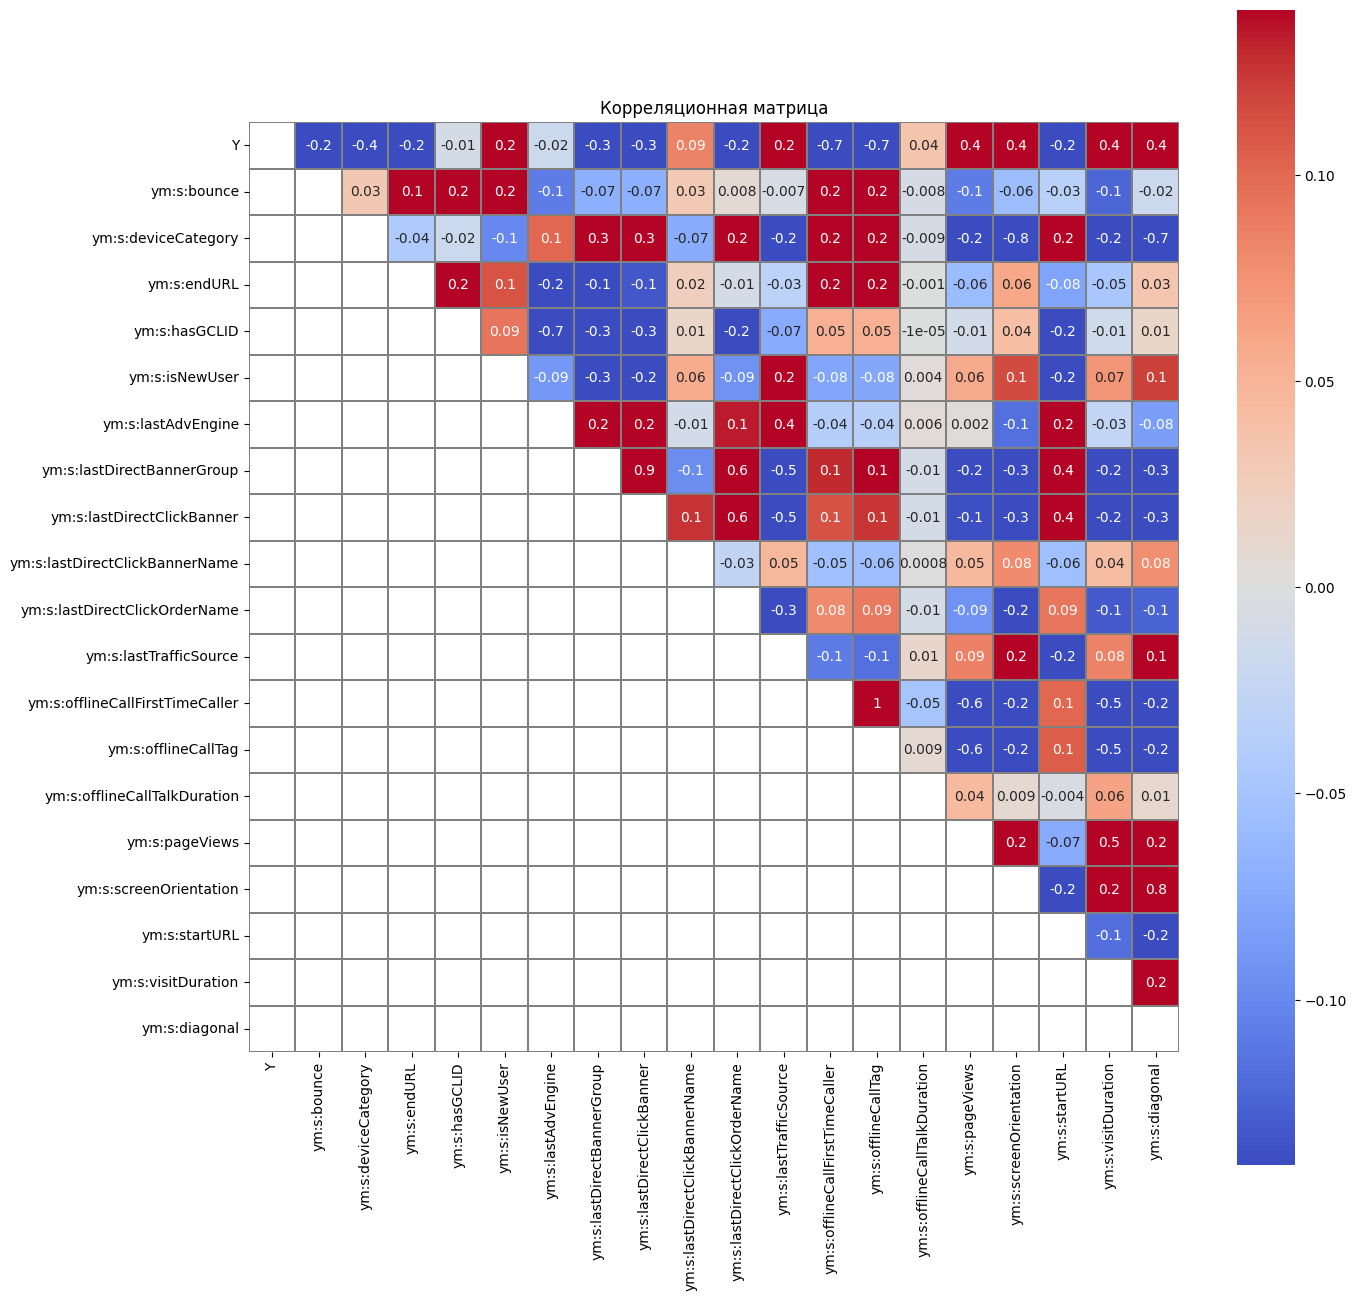

In [ ]:
list3best = scale(df3)

(306922, 26) (306922,)
                              Specs          Score
18  ym:s:offlineCallFirstTimeCaller  164011.526294
19              ym:s:offlineCallTag  116764.385034
21                   ym:s:pageViews   93855.271156
24               ym:s:visitDuration   54379.398070
3                       ym:s:endURL   18072.521979
0                       ym:s:bounce   11458.349561
5                    ym:s:isNewUser   10068.147974
14            ym:s:lastSearchEngine    9398.024210
15        ym:s:lastSearchEngineRoot    8379.605275
12     ym:s:lastDirectConditionType    3011.345698
17                 ym:s:mobilePhone    3009.334494
8        ym:s:lastDirectBannerGroup    1491.246372
22           ym:s:screenOrientation    1261.291912
2               ym:s:deviceCategory    1117.374691
1                      ym:s:browser    1038.987573
20     ym:s:offlineCallTalkDuration     985.727915
9        ym:s:lastDirectClickBanner     760.542966
25                    ym:s:diagonal     662.252634
13      

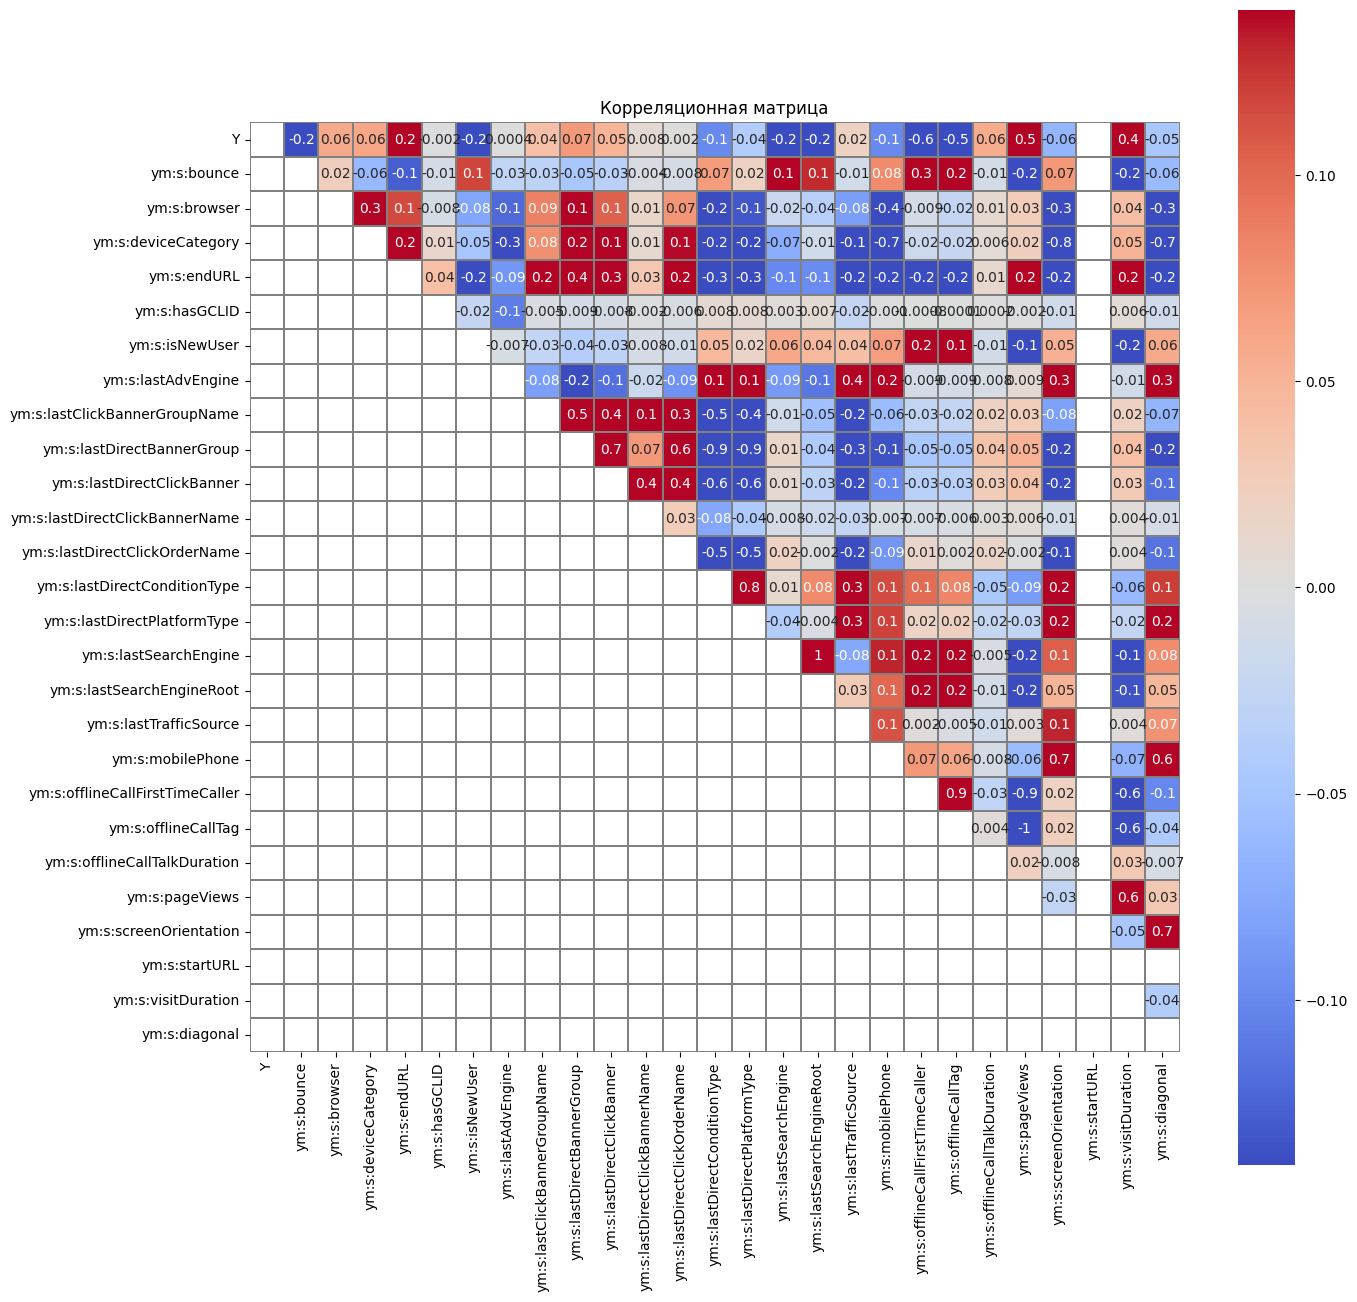

In [ ]:
list4best = scale(df4)

## Using final weights

In [ ]:
check_goals()

Goal reached in df11 13211 times in 361919 visits
Goal reached in df12 803 times in 33960 visits
Goal reached in df2 98532 times in 831061 visits
Goal reached in df3 182478 times in 734358 visits
Goal reached in df4 30620 times in 306922 visits


## Model search for new goals

In [ ]:
def create_compare_df(cols,df,id):

  # берем лучшие колонки, у которых выявлена корреляция и строим регрессионную модель
  X = df1[cols]
  y = df1['Y']
  print(X.shape,y.shape)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

  models = {}

  # Logistic Regression
  from sklearn.linear_model import LogisticRegression
  models['Logistic Regression'] = LogisticRegression()
  # Support Vector Machines
  from sklearn.svm import LinearSVC
  models['Support Vector Machines'] = LinearSVC()

  # Decision Trees
  from sklearn.tree import DecisionTreeClassifier
  models['Decision Trees'] = DecisionTreeClassifier()

  # Random Forest
  from sklearn.ensemble import RandomForestClassifier
  models['Random Forest'] = RandomForestClassifier()

  # Naive Bayes
  from sklearn.naive_bayes import GaussianNB
  models['Naive Bayes'] = GaussianNB()

  # K-Nearest Neighbors
  from sklearn.neighbors import KNeighborsClassifier
  models['K-Nearest Neighbor'] = KNeighborsClassifier()

  accuracy, precision, recall, f1 = {}, {}, {}, {}

  for key in models.keys():
      
      scaler = StandardScaler()
      X_train = scaler.fit_transform(X_train)
      X_test = scaler.transform(X_test)

      # Fit the classifier
      models[key].fit(X_train, y_train)
      
      # Make predictions
      predictions = models[key].predict(X_test)
      
      from sklearn.metrics import f1_score#,make_scorer

      # Calculate metrics
      accuracy[key] = accuracy_score(y_test, predictions)
      precision[key] = precision_score(y_test, predictions)
      recall[key] = recall_score(y_test, predictions)
      f1[key] =  f1_score(y_test, predictions)

  df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1 score'])
  df_model['Accuracy'] = accuracy.values()
  df_model['Precision'] = precision.values()
  df_model['Recall'] = recall.values()
  df_model['F1 score'] = f1.values()

  return df_model

In [ ]:
best_features = [list11best,list12best,list2best,list3best,list4best]
dfs = [df11, df12, df2, df3, df4]
ids = [11, 12, 2, 3, 4]
fs = [11, 31, 3, 1, 11]

In [ ]:
for cols, df, id, f in zip(best_features, dfs, ids, fs): 
  df_model = create_compare_df(cols,df,id)
  print(df_model)

(306922, 19) (306922,)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


                         Accuracy  Precision    Recall  F1 score
Logistic Regression      0.925130   0.680871  0.469628  0.555856
Support Vector Machines  0.926889   0.731335  0.422273  0.535404
Decision Trees           0.933438   0.680995  0.626061  0.652374
Random Forest            0.943538   0.735722  0.677335  0.705322
Naive Bayes              0.918320   0.646438  0.400065  0.494251
K-Nearest Neighbor       0.927606   0.661167  0.562704  0.607975
(306922, 19) (306922,)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


                         Accuracy  Precision    Recall  F1 score
Logistic Regression      0.924901   0.679810  0.467342  0.553900
Support Vector Machines  0.926759   0.731777  0.419660  0.533416
Decision Trees           0.933177   0.676810  0.631940  0.653606
Random Forest            0.943929   0.737177  0.680601  0.707760
Naive Bayes              0.918027   0.644444  0.397779  0.491922
K-Nearest Neighbor       0.927410   0.660756  0.559765  0.606082
(306922, 19) (306922,)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


                         Accuracy  Precision    Recall  F1 score
Logistic Regression      0.924282   0.675047  0.464729  0.550484
Support Vector Machines  0.925749   0.718593  0.420314  0.530394
Decision Trees           0.932493   0.672114  0.631287  0.651061
Random Forest            0.942137   0.731628  0.663292  0.695786
Naive Bayes              0.876682   0.421532  0.634226  0.506455
K-Nearest Neighbor       0.925227   0.647898  0.548661  0.594164
(306922, 19) (306922,)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


                         Accuracy  Precision    Recall  F1 score
Logistic Regression      0.925423   0.683960  0.469301  0.556653
Support Vector Machines  0.926987   0.733106  0.421620  0.535351
Decision Trees           0.934448   0.681661  0.643370  0.661962
Random Forest            0.943538   0.734226  0.680274  0.706221
Naive Bayes              0.921089   0.688902  0.381123  0.490749
K-Nearest Neighbor       0.927703   0.661185  0.564664  0.609125
(306922, 19) (306922,)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


                         Accuracy  Precision    Recall  F1 score
Logistic Regression      0.925553   0.685442  0.468975  0.556913
Support Vector Machines  0.927019   0.734857  0.419987  0.534497
Decision Trees           0.927964   0.648620  0.606466  0.626835
Random Forest            0.939498   0.720939  0.642064  0.679219
Naive Bayes              0.921871   0.673459  0.420967  0.518087
K-Nearest Neighbor       0.925032   0.648112  0.543762  0.591369


## RandomForestClassifier

(361919, 19) (361919,)


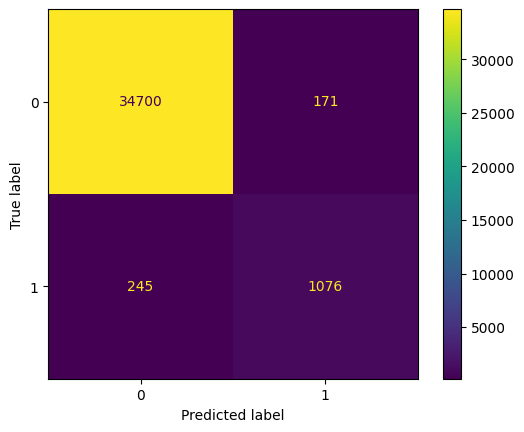

Confusion Matrix: 11
-----------------
True Negatives: 34700
False Positives: 171
False Negatives: 245
True Positives: 1076
-----------------
Relation False Positives/True Positives: 15.892193308550185 %
-----------------
precision score:  0.8628708901363272
recall score:  0.8145344436033308
f1 score:  0.8380062305295951
-----------------

(33960, 19) (33960,)


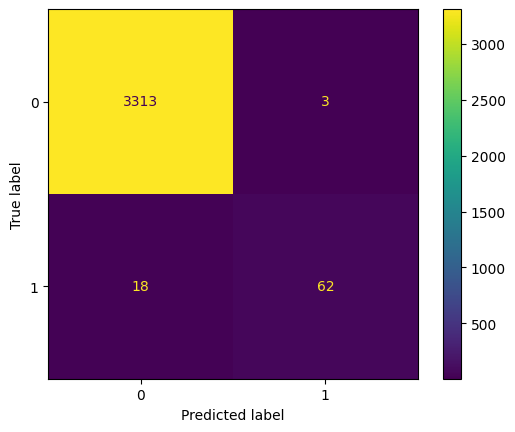

Confusion Matrix: 12
-----------------
True Negatives: 3313
False Positives: 3
False Negatives: 18
True Positives: 62
-----------------
Relation False Positives/True Positives: 4.838709677419355 %
-----------------
precision score:  0.9538461538461539
recall score:  0.775
f1 score:  0.8551724137931034
-----------------

(831061, 19) (831061,)


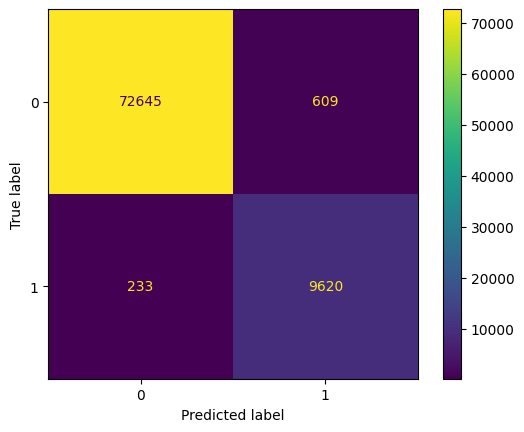

Confusion Matrix: 2
-----------------
True Negatives: 72645
False Positives: 609
False Negatives: 233
True Positives: 9620
-----------------
Relation False Positives/True Positives: 6.330561330561331 %
-----------------
precision score:  0.9404633884055137
recall score:  0.9763523799857912
f1 score:  0.9580719051887262
-----------------

(734358, 19) (734358,)


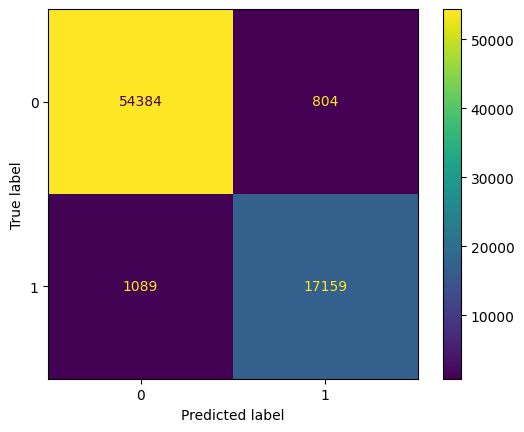

Confusion Matrix: 3
-----------------
True Negatives: 54384
False Positives: 804
False Negatives: 1089
True Positives: 17159
-----------------
Relation False Positives/True Positives: 4.685587738213183 %
-----------------
precision score:  0.9552413293993208
recall score:  0.9403222270933801
f1 score:  0.9477230675761509
-----------------

(306922, 19) (306922,)


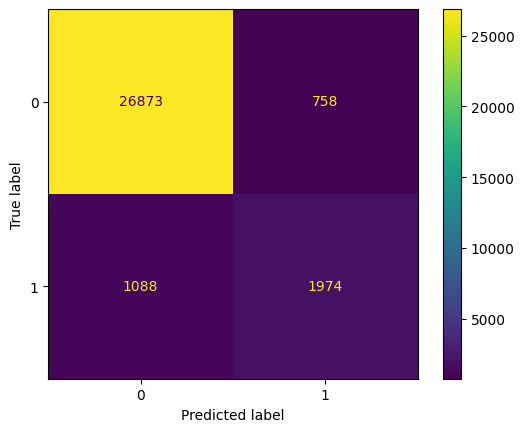

Confusion Matrix: 4
-----------------
True Negatives: 26873
False Positives: 758
False Negatives: 1088
True Positives: 1974
-----------------
Relation False Positives/True Positives: 38.39918946301925 %
-----------------
precision score:  0.7225475841874085
recall score:  0.6446766819072501
f1 score:  0.681394546082154
-----------------



In [ ]:

from sklearn.metrics import roc_auc_score, classification_report
best_features = [list11best,list12best,list2best,list3best,list4best]
dfs = [df11, df12, df2, df3, df4]
ids = [11, 12, 2, 3, 4]

for cols, df1, id, f in zip(best_features, dfs, ids, fs): 

  # берем лучшие колонки, у которых выявлена корреляция и строим регрессионную модель
  X = df1[cols]
  y = df1['Y']
  print(X.shape,y.shape)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
 
  from sklearn.ensemble import RandomForestClassifier
  
  model = RandomForestClassifier()
  
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test,y_pred)
  disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
  disp.plot()
  plt.show()
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  
  print(f'Confusion Matrix: {id}')
  print('-----------------')
  print(f'True Negatives: {tn}')
  print(f'False Positives: {fp}')
  print(f'False Negatives: {fn}')
  print(f'True Positives: {tp}')
  print('-----------------')
  print(f'Relation False Positives/True Positives: {fp*100/tp} %')
  print('-----------------')

  accuracy_score(y_test,y_pred)
  # print(classification_report(y_test,y_pred))
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  print('precision score: ', precision)
  print('recall score: ', recall)   
  f1_score = 2*precision*recall / (precision + recall)  
  print('f1 score: ', f1_score) 
  print('-----------------')
  print()
    # cm = confusion_matrix(y_test, y_pred)
  import pickle
  path = '/content/drive/MyDrive/MA/models_final_RF'
  pickle.dump(model, open(path+f'model{id}.pkl', 'wb'))
  # some time later...
  # model_loaded = pickle.load(open(path+'model.pkl', 'rb')) 
  # result = model_loaded.score(X_test, y_test)
  # print(result)